<a href="https://colab.research.google.com/github/Danalmestadi/T5-WeekFourMiniProject/blob/main/MiniProjectWeekFour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center;">
  <h1 style="text-align: center;"> Traffic Flow Prediction</h1>
<p>-----------------------------------------------------------------------------------------------------------------------------------------------------------</p>
  <p style="text-align: center;">
   Understanding traffic flow is crucial for controlling traffic, streamlining routes, and guaranteeing effective transportation systems. Predictive models can forecast traffic patterns by evaluating both historical and current data, which helps to minimize delays and enhance traffic safety. Accurate traffic flow estimations depend on advanced machine learning algorithms and data analytics, which offer insightful information to commuters, transportation authorities, and city planners alike.
  </p>
  <img src="https://media.giphy.com/media/NMdRYmkFSj2A2I9QK9/giphy.gif?cid=790b76116u6qta0eml8963gi6yh6fjh4lona896rxc1yg0x4&ep=v1_gifs_search&rid=giphy.gif&ct=g"
       alt="Traffic Flow" style="display: block; margin-left: auto; margin-right: auto; max-width: 50%; height: 50;">
</div>


### **Traffic Prediction Dataset Overview** 🚦
---
This dataset captures traffic congestion in urban areas, updated every 15 minutes over one month, offering insights for transportation planning and congestion management.

It includes a traffic situation column with four categories: Heavy, High, Normal, and Low, to assess congestion severity. The dataset has 18 columns: 12 integer, 4 string, and 2 DateTime.

**Columns Overview:**

- **Time** (object): Records the time of data collection in 'HH:MM' format.
- **Date** (int64): Contains date information in `YYYYMMDD` format.
- **Day of the week** (object): Indicates the day of the week (e.g., 'Monday', 'Tuesday').
- **CarCount** (int64): Number of cars counted during data collection.
- **BikeCount** (int64): Number of bicycles counted.
- **BusCount** (int64): Number of buses counted.
- **TruckCount** (int64): Number of trucks counted.
- **Total** (int64): Sum of CarCount, BikeCount, BusCount, and TruckCount.
- **Traffic Situation** (object): Describes traffic conditions using categories like 'Light', 'Moderate', or 'Heavy'.

##Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

##Load the Data:

In [3]:
!kaggle datasets download -d hasibullahaman/traffic-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/hasibullahaman/traffic-prediction-dataset
License(s): other
  0% 0.00/83.1k [00:00<?, ?B/s]
100% 83.1k/83.1k [00:00<00:00, 47.6MB/s]


In [4]:
!unzip traffic-prediction-dataset.zip

Archive:  traffic-prediction-dataset.zip
  inflating: Traffic.csv             
  inflating: TrafficTwoMonth.csv     


In [5]:
traffic_df=pd.read_csv('/content/Traffic.csv')
traffic_two_month_df=pd.read_csv('/content/TrafficTwoMonth.csv')

#EDA:

In the Exploratory Data Analysis (EDA) phase, we examined two datasets: one covering the last two months and the other encompassing data over the entire period.

#First dataset :

In [6]:
#explore the data
traffic_two_month_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [7]:
#explore the data
traffic_two_month_df.tail()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
5947,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
5948,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
5949,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
5950,11:30:00 PM,9,Thursday,16,5,0,27,48,normal
5951,11:45:00 PM,9,Thursday,14,3,1,15,33,low


In [8]:
#explore the data
traffic_two_month_df.shape

(5952, 9)

In [9]:
#explore the datatypes
traffic_two_month_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


###cleaning the dataset


In [10]:
#checking for null values
traffic_two_month_df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [11]:
# checking for duplicated
traffic_two_month_df.duplicated().sum()

0

In [12]:
#checking the count value for target
traffic_two_month_df['Traffic Situation'].value_counts()

,count
Traffic Situation,
normal,3610
heavy,1137
low,834
high,371


#Visualization the dataset


>**Count Plot:**
Distribution of Traffic Situations
The count plot below visualizes the distribution of different traffic situations across the dataset. The Traffic Situation column categorizes traffic flow into distinct situations such as "Heavy," “High”,"Normal," and "Low." Each bar in the plot represents the frequency of occurrences for each traffic situation.


>**Pie Chart:**
Traffic Distribution by Day of the Week
The pie chart below illustrates the distribution of traffic data across different days of the week. Each segment of the pie represents the proportion of traffic recorded on a specific day.


> **Heatmap:**
Correlation of Numerical Data
The heatmap below visualizes the correlation matrix of the numerical features in the dataset. After removing the Date, TruckCount, and CarCount columns, the remaining numerical columns are analyzed to identify how closely they are related to each other.

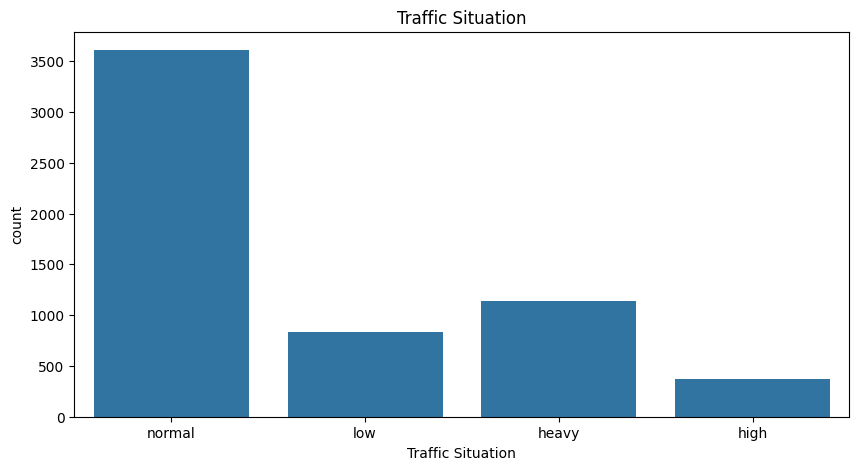

In [13]:
# visualizing using count plot
plt.figure(figsize=(10,5))
sns.countplot(x=traffic_two_month_df['Traffic Situation'])
plt.title('Traffic Situation')
plt.show()

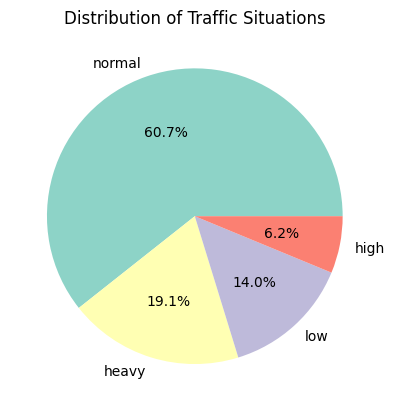

In [14]:
# visualizing using pie chart
traffic_two_month_df['Traffic Situation'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Distribution of Traffic Situations')
plt.ylabel('')
plt.show()


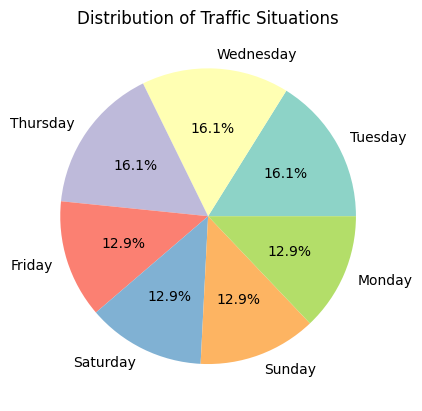

In [15]:
# visualizing using pie chart
traffic_two_month_df['Day of the week'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Distribution of Traffic Situations')
plt.ylabel('')
plt.show()

<ipython-input-16-f032df125f25>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Day of the week', y='Total', data=traffic_two_month_df, ci=None)


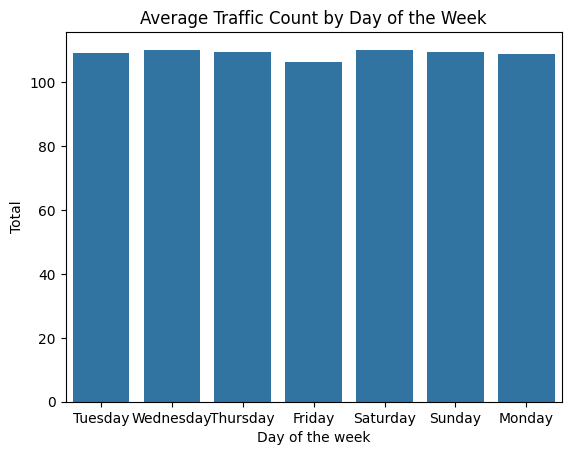

In [16]:
# visualizing using count plot

sns.barplot(x='Day of the week', y='Total', data=traffic_two_month_df, ci=None)
plt.title('Average Traffic Count by Day of the Week')
plt.show()

In [17]:
#separating the numrical datatype in different dataset
num_df=traffic_two_month_df.select_dtypes(include=['int64'])

In [55]:
# calculate correlation for matrix
corr=num_df.corr()
print(corr)

           BikeCount  BusCount     Total
BikeCount   1.000000  0.577671  0.781879
BusCount    0.577671  1.000000  0.758970
Total       0.781879  0.758970  1.000000


In [54]:
#droping unrelated columns based on the corrlation
num_df.drop(num_df[['Date','TruckCount','CarCount']],axis=1, inplace=True)

KeyError: "None of [Index(['Date', 'TruckCount', 'CarCount'], dtype='object')] are in the [columns]"

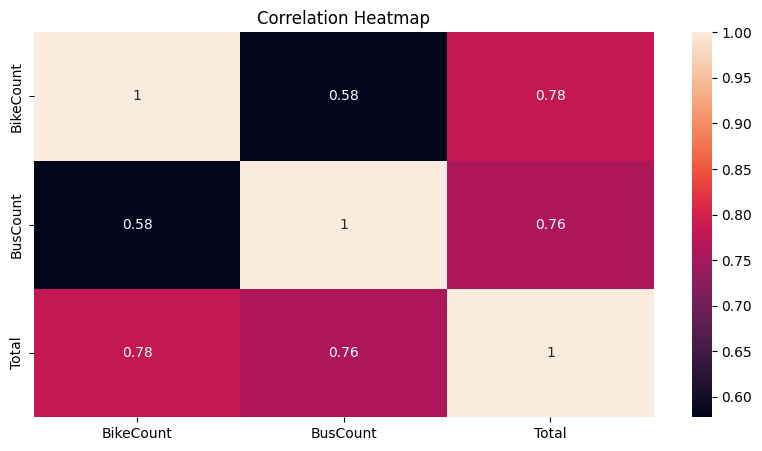

In [56]:
#visualizing the matrix using heatmap
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True  )
plt.title('Correlation Heatmap')
plt.show()

it has shown there's a strong postive corrlation between BikeCount and Total

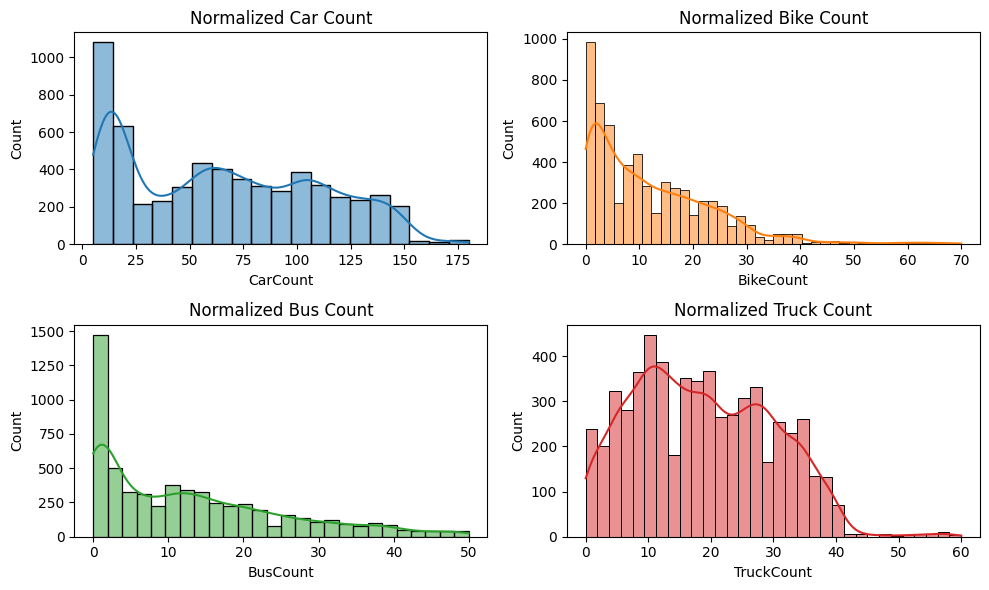

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
sns.histplot(traffic_two_month_df['CarCount'], ax=axes[0, 0], kde=True, color='#1f77b4')
sns.histplot(traffic_two_month_df['BikeCount'], ax=axes[0, 1], kde=True, color='#ff7f0e')
sns.histplot(traffic_two_month_df['BusCount'], ax=axes[1, 0], kde=True, color='#2ca02c')
sns.histplot(traffic_two_month_df['TruckCount'], ax=axes[1, 1], kde=True, color='#d62728')
axes[0, 0].set_title('Normalized Car Count')
axes[0, 1].set_title('Normalized Bike Count')
axes[1, 0].set_title('Normalized Bus Count')
axes[1, 1].set_title('Normalized Truck Count')
plt.tight_layout()
plt.show()

#Second dataset

In [22]:
#explore the dataset
traffic_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [23]:
#explore the dataset
traffic_df.tail()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal
2975,11:45:00 PM,9,Thursday,14,3,1,15,33,normal


In [24]:
#explore the dataset
traffic_df.shape

(2976, 9)

In [25]:
#explore the datatypes
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


###cleaning the dataset


In [26]:
#checking for null values
traffic_df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [27]:
#check for duplicates
traffic_df.duplicated().sum()

0

#visualization the dataset

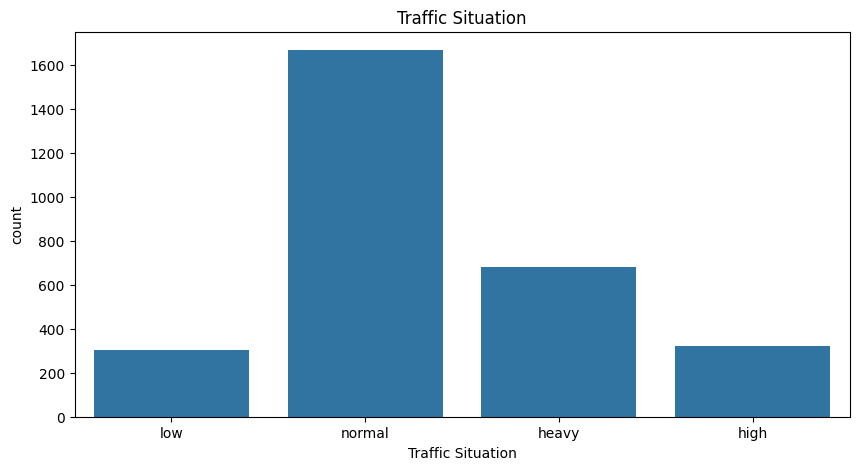

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x=traffic_df['Traffic Situation'],data=traffic_df)
plt.title('Traffic Situation')
plt.show()

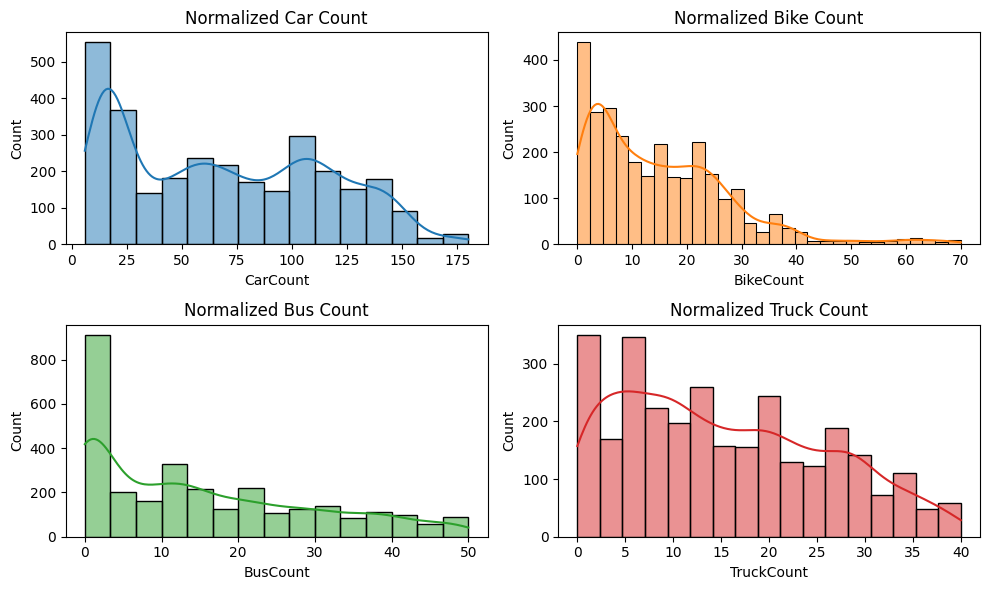

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
sns.histplot(traffic_df['CarCount'], ax=axes[0, 0], kde=True, color='#1f77b4')
sns.histplot(traffic_df['BikeCount'], ax=axes[0, 1], kde=True, color='#ff7f0e')
sns.histplot(traffic_df['BusCount'], ax=axes[1, 0], kde=True, color='#2ca02c')
sns.histplot(traffic_df['TruckCount'], ax=axes[1, 1], kde=True, color='#d62728')
axes[0, 0].set_title('Normalized Car Count')
axes[0, 1].set_title('Normalized Bike Count')
axes[1, 0].set_title('Normalized Bus Count')
axes[1, 1].set_title('Normalized Truck Count')
plt.tight_layout()
plt.show()

In [30]:
num_df2=traffic_df.select_dtypes(include=['int64'])

In [52]:
num_df2.drop(num_df2[['Date','TruckCount','CarCount']],axis=1, inplace=True)


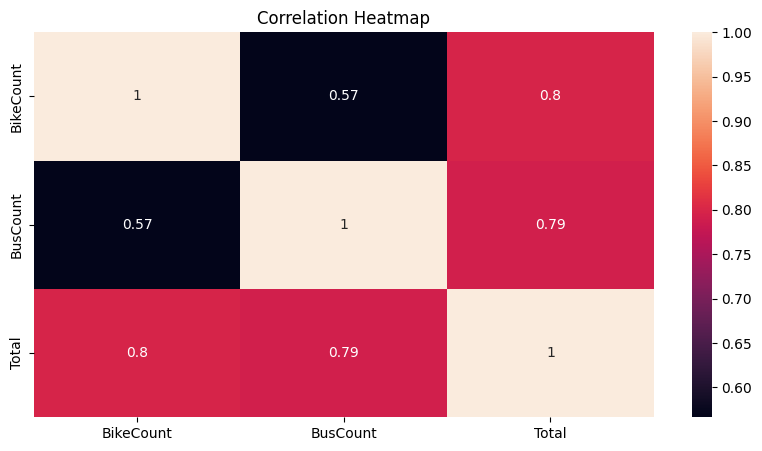

In [53]:
plt.figure(figsize=(10,5))
sns.heatmap(num_df2.corr(), annot=True  )
plt.title('Correlation Heatmap')
plt.show()

#Merging two Dataset
# Merging two datasets.

The two datasets were merged into a single dataset.
Following the merging, the dataset was scaled to ensure it was properly normalized and ready for model development.



In [33]:
#merging two dataset
merged_data = pd.merge(traffic_df, traffic_two_month_df)

In [34]:
#explore the merged dataset
merged_data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:15:00 AM,10,Tuesday,44,0,5,4,53,low


In [35]:
merged_data['Traffic Situation'].value_counts()

,count
Traffic Situation,
normal,1421
heavy,682
low,304
high,197


# LabelEncoder

In [36]:
# label encoding for each column we need to encode
le = LabelEncoder()

le.fit(merged_data['Traffic Situation'])
merged_data['Traffic Situation'] = le.transform(merged_data['Traffic Situation'])

le.fit(merged_data['Day of the week'])
merged_data['Day of the week'] = le.transform(merged_data['Day of the week'])

le.fit(merged_data['Time'])
merged_data['Time'] = le.transform(merged_data['Time'])

In [37]:
#print the merge data after encoding
print(merged_data)

      Time  Date  Day of the week  CarCount  BikeCount  BusCount  TruckCount  \
0       16    10                5        31          0         4           4   
1       18    10                5        49          0         3           3   
2       20    10                5        46          0         3           6   
3       22    10                5        51          0         2           5   
4       26    10                5        44          0         5           4   
...    ...   ...              ...       ...        ...       ...         ...   
2599     5     9                4        11          4         0          23   
2600     7     9                4        16          3         1          36   
2601     9     9                4        11          0         1          30   
2602    11     9                4        15          4         1          25   
2603    13     9                4        16          5         0          27   

      Total  Traffic Situation  
0     

#Stnader Scaling for X_traine and x_test

In [38]:
#scaling the dataframe using the StanderScaler
Scaler=StandardScaler()
df=pd.DataFrame(merged_data)
print(df)

      Time  Date  Day of the week  CarCount  BikeCount  BusCount  TruckCount  \
0       16    10                5        31          0         4           4   
1       18    10                5        49          0         3           3   
2       20    10                5        46          0         3           6   
3       22    10                5        51          0         2           5   
4       26    10                5        44          0         5           4   
...    ...   ...              ...       ...        ...       ...         ...   
2599     5     9                4        11          4         0          23   
2600     7     9                4        16          3         1          36   
2601     9     9                4        11          0         1          30   
2602    11     9                4        15          4         1          25   
2603    13     9                4        16          5         0          27   

      Total  Traffic Situation  
0     

#Split the Merged Data into Train and test

---



In [39]:
#Splting the dataset into Train and Test
X = merged_data.drop('Traffic Situation', axis=1)
y = merged_data['Traffic Situation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Buliding the Model

In [46]:
#calling the model from keras
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))
# Adding more hidden layer
model.add(Dense(units=6, activation='relu'))

model.add(Dense(units=6, activation='relu'))

# Add output layer
model.add(Dense(units=4, activation='softmax'))  # Adjust the number of units

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Training the model

In [57]:
#fitting the model
model.fit(X_train, y_train, epochs=30, batch_size=10)

Epoch 1/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5357 - loss: 1.1384
Epoch 2/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5479 - loss: 1.1183
Epoch 3/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5476 - loss: 1.1223
Epoch 4/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5346 - loss: 1.1496
Epoch 5/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5566 - loss: 1.1053
Epoch 6/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5499 - loss: 1.1196
Epoch 7/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5447 - loss: 1.1278
Epoch 8/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5329 - loss: 1.1392
Epoch 9/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5403 - loss: 1.1245
Epoch 10/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5394 - loss: 1.1396
Epoch 11/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5344 - loss: 1.1484
Epoch 12/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              28 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,110 (12.15 KB)

 Trainable params: 1,036 (4.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,074 (8.11 KB)

#Model evaluation

In [48]:
#evaloting the model
model.evaluate(X_test, y_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5732 - loss: 1.0866  


[1.1397113800048828, 0.5412667989730835]

#Predict the Model

In [44]:
#here we predict the model and check for the accurcy and recall with classification_report method
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


#Eveluating the Model

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.00      0.00      0.00        39
           2       0.00      0.00      0.00        67
           3       0.54      1.00      0.70       282

    accuracy                           0.54       521
   macro avg       0.14      0.25      0.18       521
weighted avg       0.29      0.54      0.38       521

[[  0   0   0 133]
 [  0   0   0  39]
 [  0   0   0  67]
 [  0   0   0 282]]


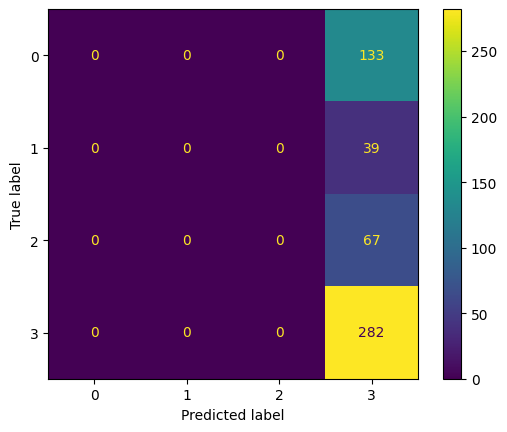

In [49]:
#here we disply confusion_matrix and classification_report with the plot
print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_classes)
plt.show()

#Drawing Plot to show Accurcy and Recall

Epoch 1/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5683 - loss: 1.0990 - val_accuracy: 0.5228 - val_loss: 1.1375
Epoch 2/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5494 - loss: 1.1464 - val_accuracy: 0.5228 - val_loss: 1.1380
Epoch 3/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5678 - loss: 1.1090 - val_accuracy: 0.5228 - val_loss: 1.1381
Epoch 4/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5528 - loss: 1.1189 - val_accuracy: 0.5228 - val_loss: 1.1381
Epoch 5/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5643 - loss: 1.1033 - val_accuracy: 0.5228 - val_loss: 1.1385
Epoch 6/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5509 - loss: 1.1234 - val_accuracy: 0.5228 - val_loss: 1.1384
Epoch 7/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5693 - loss: 1.0934 - val_accuracy: 0.5228 - val_loss: 1.1387
Epoch 8/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5445 - loss: 1.1346 - val_accuracy: 0.

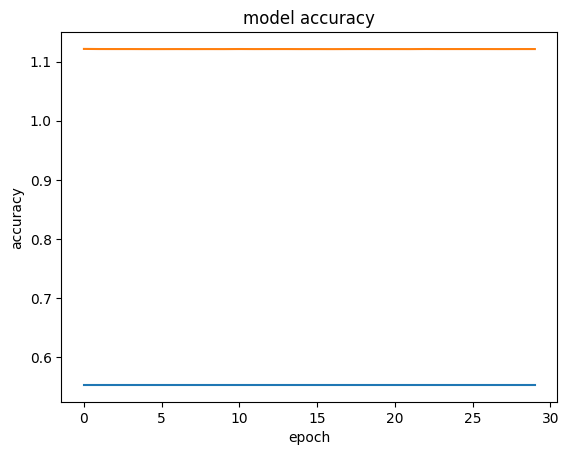

In [50]:
history = model.fit(X_train, y_train, epochs=30, batch_size=10, validation_split=0.2)

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# **Conclusion**
 the deep learning-based traffic congestion prediction study successfully showed how advanced algorithms can evaluate complicated information to predict traffic patterns.
 This project offers important insights that can optimize urban design, improve traffic management, and raise overall road safety by accurately predicting congestion.
 This creative method is a big step toward building more intelligent, effective transportation systems.